## Final Project Submission

Please fill out:
* Student name: Solphine Joseph, Grace Rotich, Mather Rotich, Hilary Simiyu, Clyde Ochieng.
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: Nikita 
* Blog post URL:


# Kings County Housing Analysis with Multiple Linear Regression

## Overview


A real estate agency in Kingsway seeks to determine what are the contributing factors that affect the price of houses to make improvements where necessary. They want to employ an analytical approach rather than sentimental before arriving at a decision. Multilinear regression has been used for this project to understand how various features affect their pricing to better their services.

## Business Problem

In the face of market fluctuations and heightened competition within the real estate sector, our agency is grappling with pricing volatility, which poses significant challenges for our agents in devising effective business strategies. We seek strategic guidance to optimize our purchasing and selling endeavors, prioritizing informed decision-making to identify key areas of focus that promise maximum returns on investment.

### Objectives
* To determine the key factors influencing house prices.
* To develop multilinear regression models to predict house prices based on relevant features.
* To use insights from the regression analysis to optimize pricing strategies for both purchasing and selling properties.


### Data Understanding:

The real estate agency in Kingsway is analyzing a dataset to determine the factors affecting house prices. The dataset likely includes features such as property size, location, age, and market trends. Key steps include assessing data quality, exploring relationships between features and prices, and preprocessing data for multilinear regression analysis. Multilinear regression will be used to model how these features collectively influence house prices, with evaluation metrics used to assess predictive accuracy.

##### King County Housing Data Columns 

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. 
* `grade` - Overall grade of the house. 
* `sqft_above` - Square footage of house apart from basement 
* `sqft_basement` - Square footage of the basement – (Ignored)
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated – (Ignored)
* `zipcode` - ZIP Code used by the United States Postal Service 
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

### Explotory Data Analyis

Importing data.

In [50]:
#importing libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

##### Removing irrelvant columns

In [51]:
#load and preiview data
df = pd.read_csv('data/kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00000,3,1.00000,1180,5650,1.00000,NaN,NONE,...,7 Average,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,6414100192,12/9/2014,538000.00000,3,2.25000,2570,7242,2.00000,NO,NONE,...,7 Average,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639
2,5631500400,2/25/2015,180000.00000,2,1.00000,770,10000,1.00000,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.73790,-122.23300,2720,8062
3,2487200875,12/9/2014,604000.00000,4,3.00000,1960,5000,1.00000,NO,NONE,...,7 Average,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,1954400510,2/18/2015,510000.00000,3,2.00000,1680,8080,1.00000,NO,NONE,...,8 Good,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We see that waterfrront is missing about 11% of its values, year renovated is missing about 17% of its values and view is missing a few values as well. 

## Data Preparation

### Data Cleaning


In [53]:
#drop irrelevant columns
df.drop(['id', 'date', 'zipcode', 'lat', 'long', 'yr_renovated', 'view'],
        axis=1, inplace=True)

In [54]:
#fill in missing sqft_basement values
df.loc[df.sqft_basement == '?', 'sqft_basement'] = (
    df[df.sqft_basement == '?'].sqft_living - 
    df[df.sqft_basement == '?'].sqft_above
)

#convert into numeric
df['sqft_basement'] = df.sqft_basement.astype('float64')

#sqft_basement is a zero inflated variable, so I convert it into 
#a categorical variable
df['is_basement'] = df.sqft_basement.map(lambda x: 0 if x == 0 else 1)
df.drop('sqft_basement', axis=1, inplace=True)

In [55]:
#convert condition and grade into numeric values
df['condition'] = df.condition.map(lambda x: 0 if x=='Poor' 
                                   else (1 if x=='Fair'
                                    else (2 if x=='Average'
                                    else  (3 if x=='Good' else 4))))

df['grade'] = df.grade.map(lambda x: int(x[0:2]) - 3)

In [56]:
#convert waterfront strings to 0 and 1
df['waterfront'] = df.waterfront.map(lambda x: 0 if x=="NO" 
                                     else (1 if x=="YES" else None))

#create new column indicating if waterfront value is missing
waterfront = df[["waterfront"]]
missing_indicator = MissingIndicator()
missing_indicator.fit(waterfront)
waterfront_missing = missing_indicator.transform(waterfront)

#add waterfront missing to dataframe and convert to binary
df['waterfront_missing'] = waterfront_missing

df['waterfront_missing'] = df.waterfront_missing.map(lambda x: 0 if x==False
                                         else 1)


In [57]:
#fill in missing waterfront values with median
imputer = SimpleImputer(strategy="median")

imputer.fit(waterfront)
waterfront_imputed = imputer.transform(waterfront)

df['waterfront'] = waterfront_imputed

In [58]:
#removing outliers 

#make a copy of the clean dataframe 
no_out = main_df.copy()

#drop columns that we cannot use 
no_out = no_out.drop(columns= ['id', 'zip_city', 'Waterfront'], axis=1)

#change data type so that we can math 
no_out = no_out.astype('float')

#pull out the columns 
columns = no_out.columns

#for each column in the dataframe, get the mean and standard deviation 
#then get the z-score for within 3 standard devaitions
for col in columns:
        
        mean = no_out[col].mean()
        sd = no_out[col].std()
        
        no_out = no_out[(no_out[col] <= mean+(3*sd))]
        
pd.set_option('display.float_format', lambda x: '%.5f' % x)
no_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19479 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           19479 non-null  float64
 1   bedrooms        19479 non-null  float64
 2   bathrooms       19479 non-null  float64
 3   sqft_living     19479 non-null  float64
 4   sqft_lot        19479 non-null  float64
 5   floors          19479 non-null  float64
 6   sqft_above      19479 non-null  float64
 7   sqft_living15   19479 non-null  float64
 8   sqft_lot15      19479 non-null  float64
 9   grade_num       19479 non-null  float64
 10  bed_bath_ratio  19479 non-null  float64
 11  mean_price      19479 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


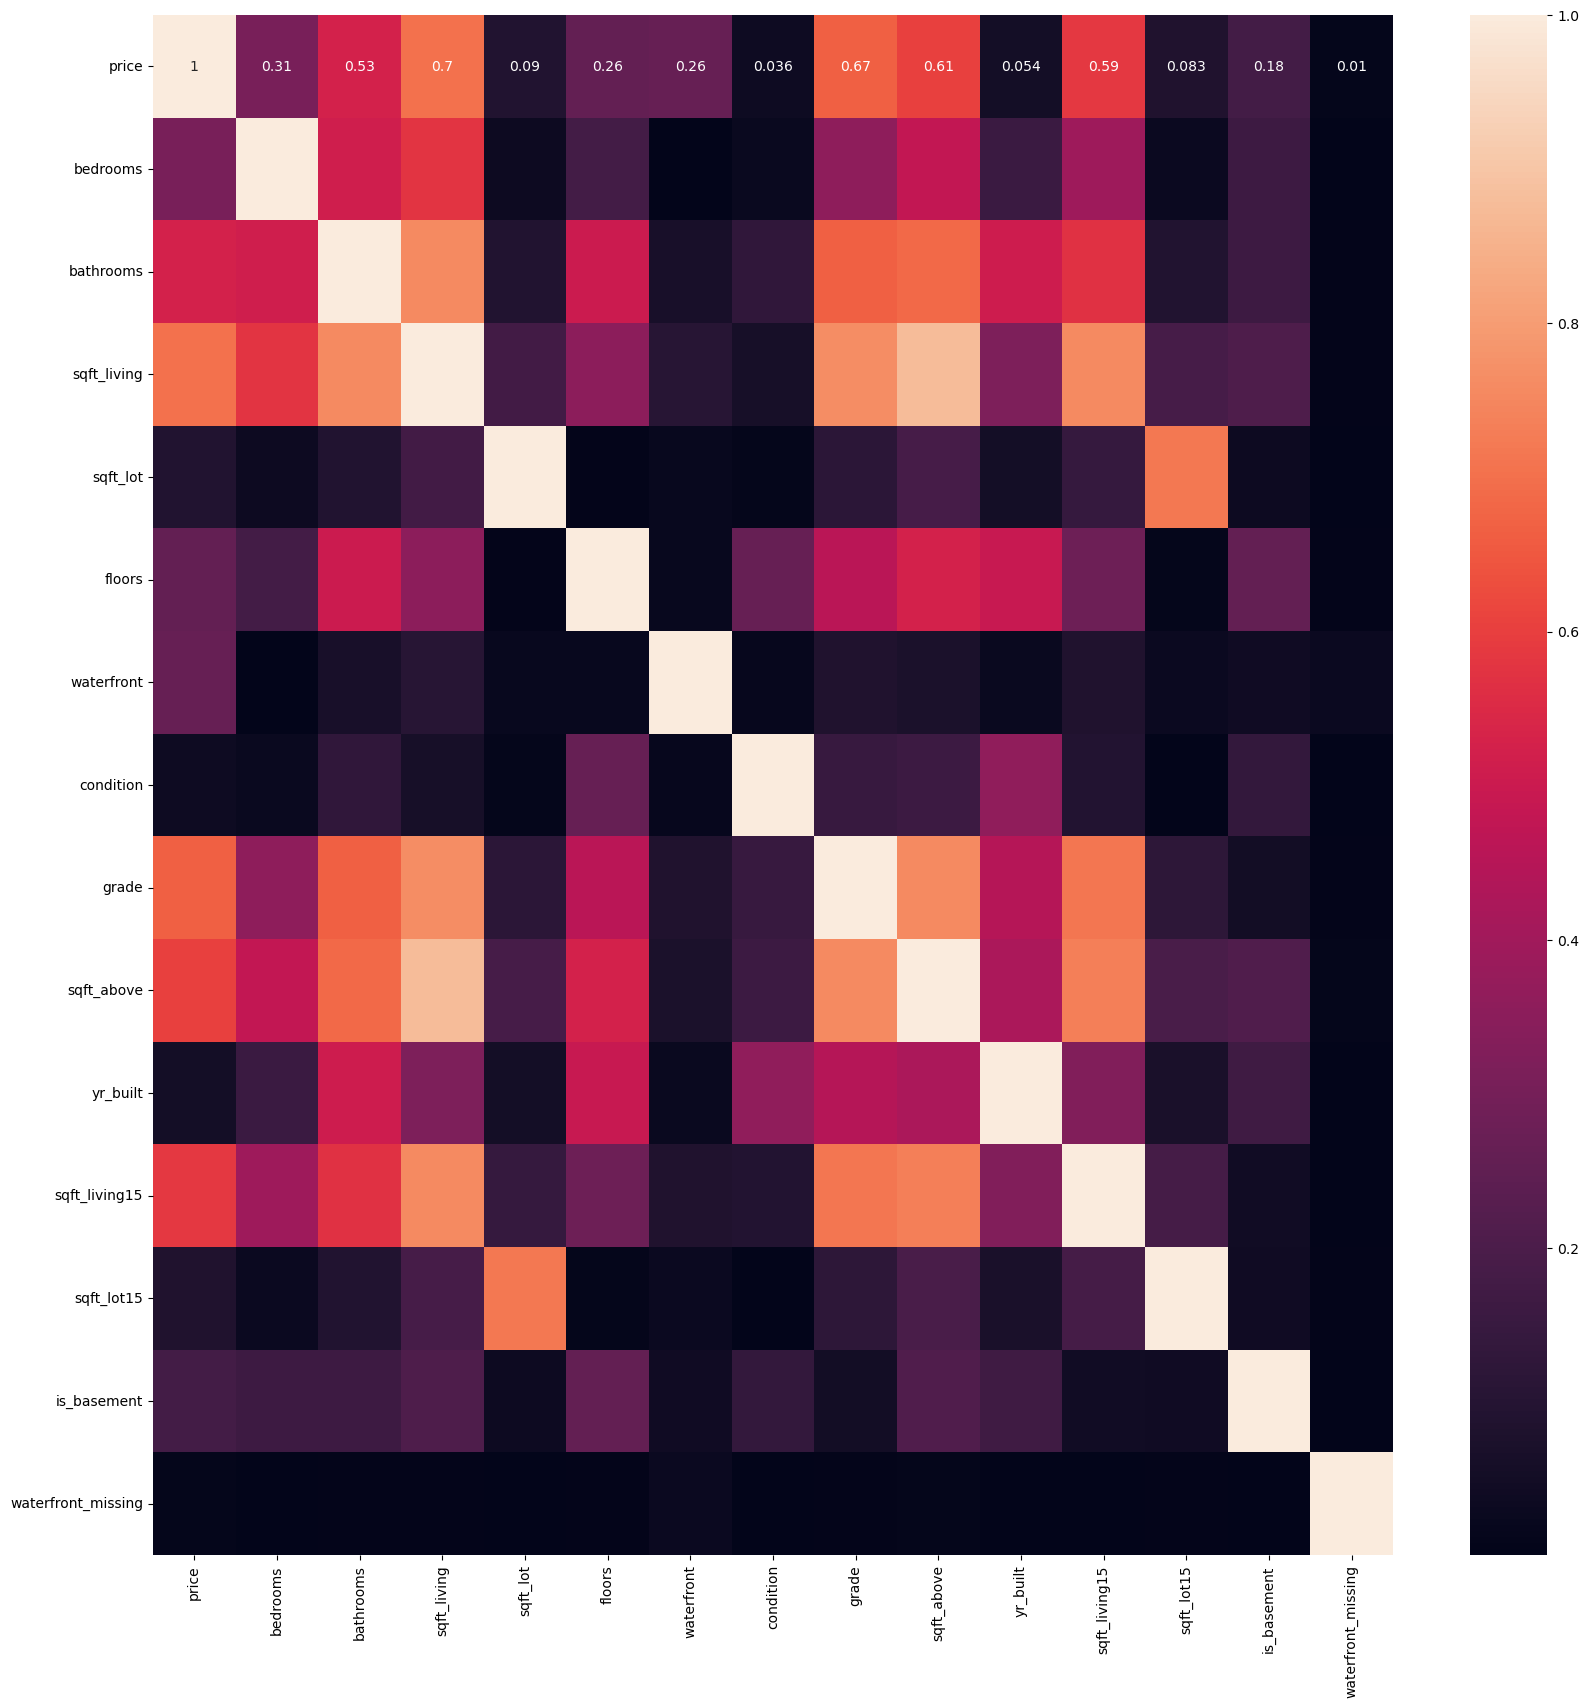

In [59]:
#visual of the clean_df in a heatmap to look at correlations
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()